In [17]:
from pandas_datareader import data as web
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')


In [28]:

# Get the stock symbols in the portfolio (FAANG)
assets = ['TSLA', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [29]:
# Assign weights to your portfolio
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [30]:
# Get the portfolio start date
stockStartDate = '2013-01-01'

In [31]:
# Get the portfolio end date
today = datetime.today().strftime('%Y-%m-%d')
print(today)

2023-09-18


In [32]:
# Create a dataframe
df = pd.DataFrame()

# Store the adjusted close price of each stock
for stock in assets:
    stock_data = yf.download(stock, start=stockStartDate, end=today)
    df[stock] = stock_data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [33]:
df

,TSLA,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,2.357333,12.865500,16.791187,13.144286,18.013729
2013-01-03,2.318000,12.924000,16.579241,13.798571,18.024191
2013-01-04,2.293333,12.957500,16.117437,13.711429,18.380356
2013-01-07,2.289333,13.423000,16.022627,14.171429,18.300158
2013-01-08,2.245333,13.319000,16.065744,13.880000,18.264042
...,...,...,...,...,...
2023-09-11,273.579987,143.100006,179.360001,445.359985,137.740005
2023-09-12,267.480011,141.229996,176.300003,434.690002,136.070007
2023-09-13,271.299988,144.850006,174.210007,412.239990,137.500000


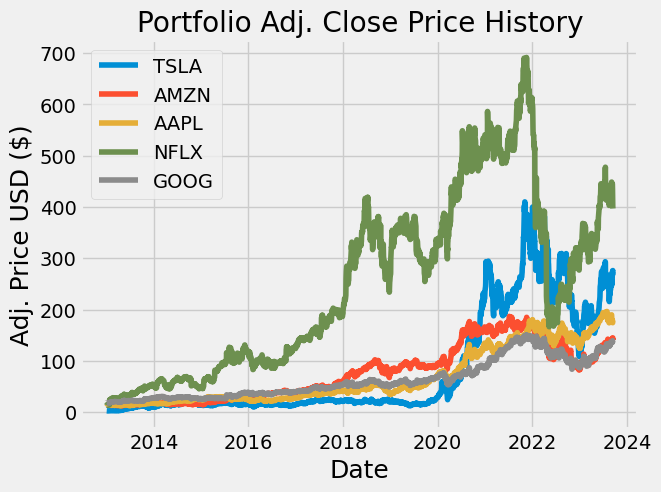

In [34]:
# Visualize stock data
title = 'Portfolio Adj. Close Price History'

# Get the stocks
my_stocks = df

# Create and plot graph
for c in my_stocks.columns.values:  # Use 'columns' instead of 'column'
    plt.plot(my_stocks[c], label=c)

plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Price USD ($)', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()


In [35]:
# show daily returns
returns = df.pct_change()
returns

,TSLA,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.016685,0.004547,-0.012622,0.049777,0.000581
2013-01-04,-0.010642,0.002592,-0.027854,-0.006315,0.019760
2013-01-07,-0.001744,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.019220,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2023-09-11,0.100925,0.035231,0.006623,0.005781,0.003936
2023-09-12,-0.022297,-0.013068,-0.017061,-0.023958,-0.012124
2023-09-13,0.014281,0.025632,-0.011855,-0.051646,0.010509


In [36]:
# create and show the annualised covvarience matrix
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

,TSLA,AMZN,AAPL,NFLX,GOOG
TSLA,0.327249,0.069815,0.061362,0.087842,0.056112
AMZN,0.069815,0.107064,0.046673,0.073315,0.056284
AAPL,0.061362,0.046673,0.082021,0.043417,0.044433
NFLX,0.087842,0.073315,0.043417,0.222287,0.055333
GOOG,0.056112,0.056284,0.044433,0.055333,0.075097


In [37]:
# calculate portfolio varience
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.08011542919504377

In [38]:
# calculate portfolio volatility
port_volatility = np.sqrt(port_variance)
port_volatility

0.28304669083923906

In [41]:
# calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean()* weights) * 252
portfolioSimpleAnnualReturn

0.36054984358750075

In [42]:
# show the expected annual return
percent_var = str(round(port_variance, 2) *100) +'%'
percent_vols = str(round(port_volatility, 2)* 100) +'%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) +'%'

print('Expected annual return: ' +percent_ret)
print('Annual volatility / risk: '+percent_vols)
print('Annual Variance: ' + percent_var)

Expected annual return: 36.0%
Annual volatility / risk: 28.000000000000004%
Annual Variance: 8.0%


In [43]:
!pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.5 MB/s eta 0:00:00


In [44]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [45]:
# portfolio optimisation
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('TSLA', 0.31273), ('AMZN', 0.0654), ('AAPL', 0.34779), ('NFLX', 0.21854), ('GOOG', 0.05553)])
Expected annual return: 37.1%
Annual volatility: 31.3%
Sharpe Ratio: 1.12


(0.37063110116487086, 0.31253725249396114, 1.1218857859884903)

In [46]:
# get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)
allocation, leftover = da.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'TSLA': 17, 'AMZN': 7, 'AAPL': 30, 'NFLX': 8, 'GOOG': 6}
Funds remaining: $97.02
